In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/DataClass/heart.csv')

DATA CLEANING

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.size

14350

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum().sort_values(ascending=True)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [9]:
#Removing extra space and organizing our data
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

In [10]:
#check Duplicates
df.duplicated().sum()

np.int64(723)

In [11]:
df[df.duplicated()].head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
82,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
84,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


Basic question


In [12]:
#1. What is the average age of patients in the dataset?
df['age'].mean()


np.float64(54.43414634146342)

The average patient age is 54.4 years, indicating that heart disease risk becomes prominent during middle age. This insight highlights the importance of early preventive screening and lifestyle interventions for individuals in their 40s and 50s

In [13]:
#2. What is the gender distribution of patients?
df['sex'].value_counts()

,count
sex,
1,713
0,312


Approximately 71% of patients are male and 29% are female, highlighting a gender imbalance. This suggests that male patients may either be more frequently diagnosed with heart disease or more represented in the study

In [14]:
#3. What is the average resting blood pressure of patients?
df['trestbps'].mean()


np.float64(131.61170731707318)

The average resting blood pressure among patients is approximately 131.6 mm Hg, slightly above the normal range. This highlights the importance of monitoring and managing blood pressure to reduce heart disease risk.

In [15]:
#4. How many patients have fasting blood sugar levels higher than 120 mg/dl?
df['fbs'].sum()

np.int64(153)

153 patients (approximately 15%) have fasting blood sugar levels above 120 mg/dl. These patients represent a high-risk subgroup, underlining the need for targeted lifestyle, dietary, and medical interventions to prevent heart disease.

In [16]:
#5. What are the different types of chest pain recorded in the dataset?
df['cp'].unique()


array([0, 1, 2, 3])

Typical (0) and atypical angina (1) are more likely to be associated with heart disease, meaning patients presenting these types of pain are higher risk.

Non-anginal (2) and asymptomatic (3) patients may still have heart disease, but generally lower observed risk.

In [17]:
#6. What is the maximum heart rate achieved by patients?
df['thalach'].max()


202

The highest recorded maximum heart rate among patients is 202 bpm. This insight can guide the development of safe and personalized exercise programs, particularly for patients with reduced cardiac capacity.

In [18]:
#7. What percentage of patients experience exercise-induced angina?
percentage_exang = df['exang'].mean() * 100
percentage_exang

np.float64(33.65853658536586)

Approximately 33.7% of patients experience exercise-induced angina, highlighting a significant subgroup with limited cardiovascular tolerance. This insight can guide personalized exercise and monitoring programs to improve patient safety and outcomes.

In [19]:
#8. What is the average cholesterol level in the dataset?
df['chol'].mean()


np.float64(246.0)

The average cholesterol level among patients is 246 mg/dl, placing them in the high-risk category. This emphasizes the need for targeted lifestyle and medical interventions to prevent heart disease.

In [20]:
#9. How many patients have a resting electrocardiographic result of 2?
count_ecg2 = df['restecg'].value_counts()[2]
count_ecg2

np.int64(15)

15 patients have a resting ECG result of 2, indicating potential abnormal cardiac activity. This small subgroup is clinically significant and should be prioritized for further evaluation and preventive care.

In [21]:
#10. What is the distribution of the number of major vessels colored by fluoroscopy?
df['ca'].value_counts()


,count
ca,
0,578
1,226
2,134
3,69
4,18


578 patients have no major vessels affected, while smaller groups have 1–4 vessels involved. Patients with 2–4 vessels affected are at higher risk of severe coronary artery disease and should be prioritized for clinical interventions, enabling efficient resource allocation and better patient outcomes.

**Medium Question**


In [22]:
#1. What is the correlation between age and cholesterol levels?
df[['age', 'chol']].corr()


,age,chol
age,1.000000,0.219823
chol,0.219823,1.000000


The correlation between age and cholesterol is approximately 0.22, indicating a weak positive relationship. Cholesterol slightly increases with age.

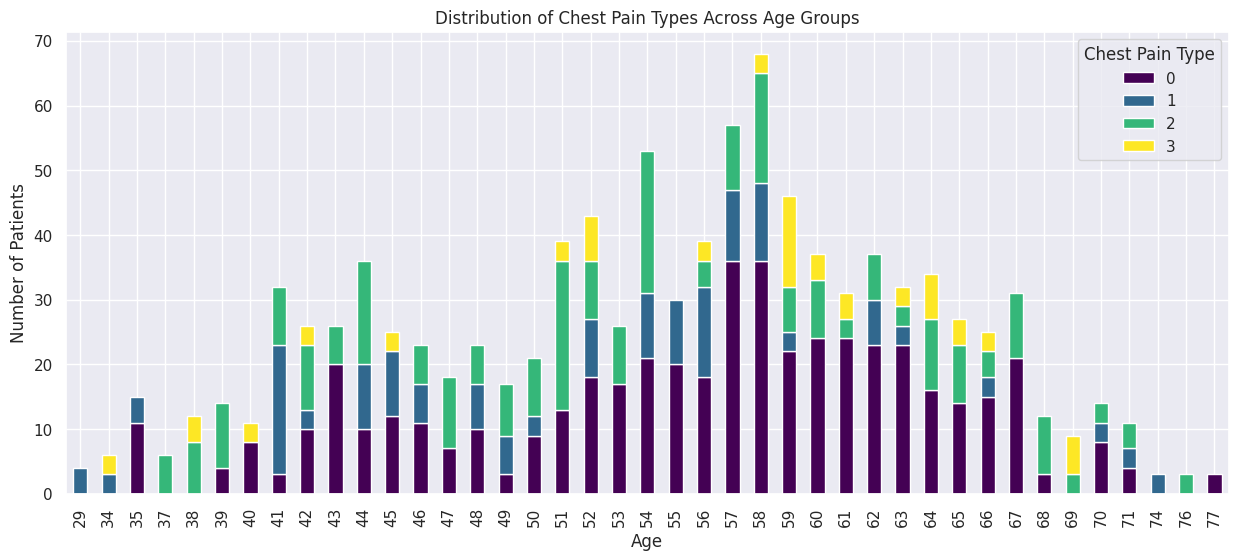

In [23]:
#2. What is the distribution of chest pain types across different age groups?
df.groupby('age')['cp'].value_counts().unstack().plot(
    kind='bar',
    stacked=True,
    figsize=(15,6),
    colormap='viridis'
)
plt.title("Distribution of Chest Pain Types Across Age Groups")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend(title="Chest Pain Type")
plt.show()

The distribution of chest pain types shows that patients aged 51–60 have the highest number of cases, particularly typical and atypical angina. This age group should be prioritized for heart disease screening and preventive care initiatives.

In [24]:
#3. How does maximum heart rate vary with exercise-induced angina?
df.groupby('exang')['thalach'].mean()


,thalach
exang,
0,155.342647
1,136.837681


Patients with exercise-induced angina have a lower average maximum heart rate (≈137 bpm) compared to those without angina (≈155 bpm). This demonstrates reduced cardiovascular capacity and highlights the need for tailored exercise programs and monitoring to ensure patient safety.

In [25]:
#4. Is there a significant difference in resting blood pressure between male and female patients?
df.groupby('sex')['trestbps'].mean()


,trestbps
sex,
0,133.701923
1,130.697055


Female patients have a slightly higher average resting blood pressure (133.7 mm Hg) than male patients (130.7 mm Hg).

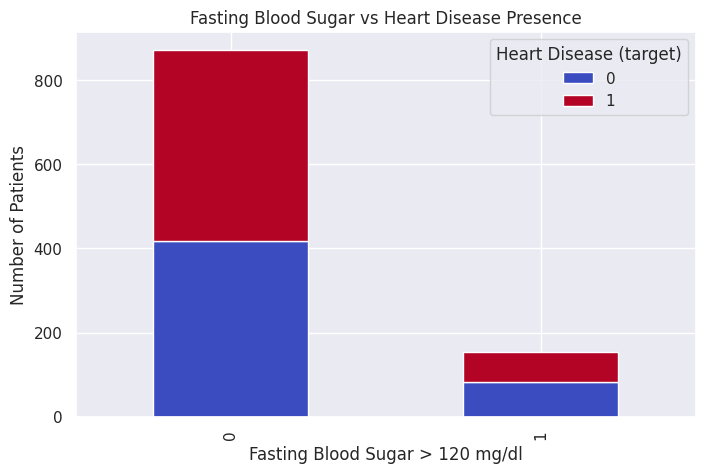

In [26]:
#5. What is the relationship between fasting blood sugar levels and the presence of heart disease?
pd.crosstab(df['fbs'], df['target']).plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='coolwarm'
)
plt.title("Fasting Blood Sugar vs Heart Disease Presence")
plt.xlabel("Fasting Blood Sugar > 120 mg/dl")
plt.ylabel("Number of Patients")
plt.legend(title="Heart Disease (target)")
plt.show()

The analysis shows that patients with normal fasting blood sugar (≤120 mg/dl) still exhibit significant heart disease prevalence, while those with high FBS (>120 mg/dl) have nearly equal numbers of patients with and without heart disease. This indicates that FBS alone is not a strong predictor of heart disease, emphasizing the need for multi-factor risk assessment.

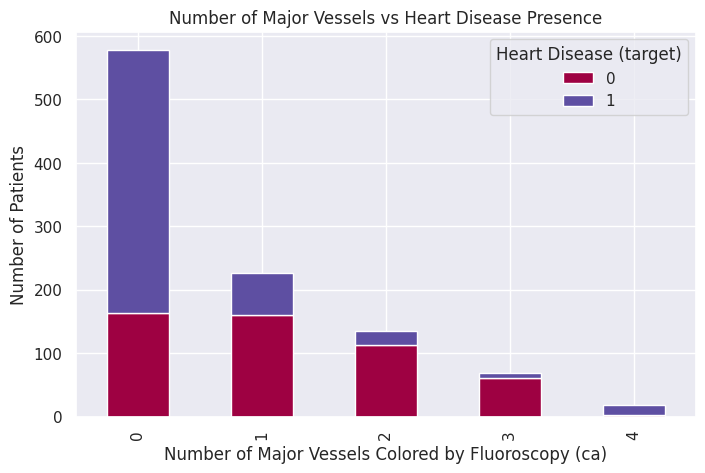

In [27]:
#6. How does the number of major vessels (ca) affect the target variable (heart disease presence)?
pd.crosstab(df['ca'], df['target']).plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='Spectral'
)
plt.title("Number of Major Vessels vs Heart Disease Presence")
plt.xlabel("Number of Major Vessels Colored by Fluoroscopy (ca)")
plt.ylabel("Number of Patients")
plt.legend(title="Heart Disease (target)")
plt.show()

Analysis shows that patients with 1–3 major vessels affected generally have higher heart disease prevalence, while 0 vessels affected also shows substantial heart disease, and 4 vessels affected mostly have no heart disease

In [28]:
#7. What is the average oldpeak value for patients with different types of chest pain?
df.groupby('cp')['oldpeak'].mean()


,oldpeak
cp,
0,1.438833
1,0.323952
2,0.784507
3,1.380519


The average ST depression varies by chest pain type: typical angina (1.44) and asymptomatic patients (1.38) show the highest values, non-anginal pain (0.78) is moderate, and atypical angina (0.32) is the lowest.

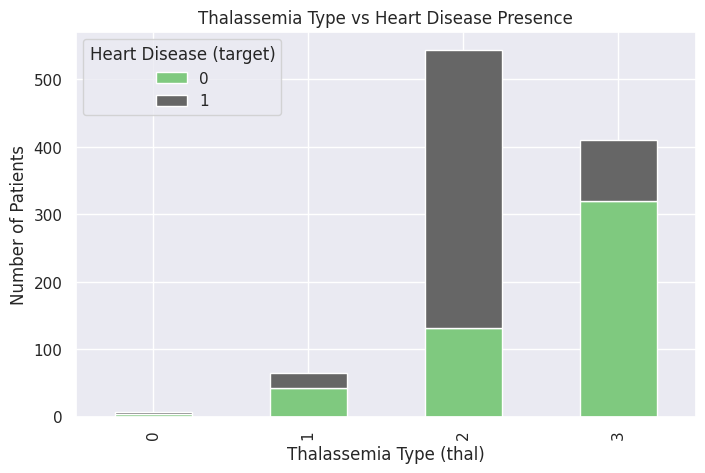

In [29]:
#8. Analyze the distribution of thalassemia types (thal) among patients with heart disease.
pd.crosstab(df['thal'], df['target']).plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='Accent'
)
plt.title("Thalassemia Type vs Heart Disease Presence")
plt.xlabel("Thalassemia Type (thal)")
plt.ylabel("Number of Patients")
plt.legend(title="Heart Disease (target)")
plt.show()

Certain thalassemia types, especially fixed defects (2) and normal (1), are associated with higher heart disease prevalence.

In [30]:
#9. What are the most common combinations of risk factors in patients with heart disease?
hd_patients = df[df['target'] == 1]

# Find most common combinations of risk factors
risk_combinations = (
    hd_patients.groupby(['cp', 'fbs', 'exang', 'thal'])
    .size()
    .reset_index(name='counts')
    .sort_values(by='counts', ascending=False)
)

risk_combinations.head(10)

,cp,fbs,exang,thal,counts
15,2,0,0,2,133
8,1,0,0,2,97
1,0,0,0,2,73
19,2,1,0,2,32
16,2,0,0,3,19
4,0,0,1,2,18
23,3,0,0,2,16
9,1,0,0,3,15
17,2,0,1,2,13
24,3,0,0,3,10


The most common heart disease profiles in our dataset include chest pain types 0–2, normal fasting sugar, no exercise-induced angina, and thalassemia type 2. These recurring patterns help identify high-risk patients and guide targeted preventive interventions.”

In [31]:
#10. Perform a pairwise comparison of clinical measurements for patients with and without heart disease.
hd_patients = df[df['target'] == 1]
hd_patients.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.0
mean,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772,1.0
std,9.631804,0.495498,0.945881,16.112188,53.010345,0.342029,0.502109,19.096928,0.342029,0.771079,0.590295,0.871462,0.468949,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.500000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,265.750000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


**Without Heart Disease**

In [32]:
no_hd_patients = df[df['target'] == 0]
no_hd_patients.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078,0.0
std,7.908153,0.378059,0.908024,18.576736,49.558924,0.370945,0.544825,22.565235,0.498083,1.290956,0.568932,1.032108,0.685460,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.000000,284.000000,0.000000,1.000000,156.000000,1.000000,2.500000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


*   Chest pain type (cp) and resting ECG (restecg) are more indicative of heart
disease than traditional risk factors like cholesterol or BP in this dataset.

*   Exercise-induced angina (exang) is surprisingly more frequent in non-heart disease patients may need deeper investigation.

*   Oldpeak shows higher mean in non-heart disease patients — could reflect false positives, measurement errors, or stress from other conditions.

**Advanced Analysis**

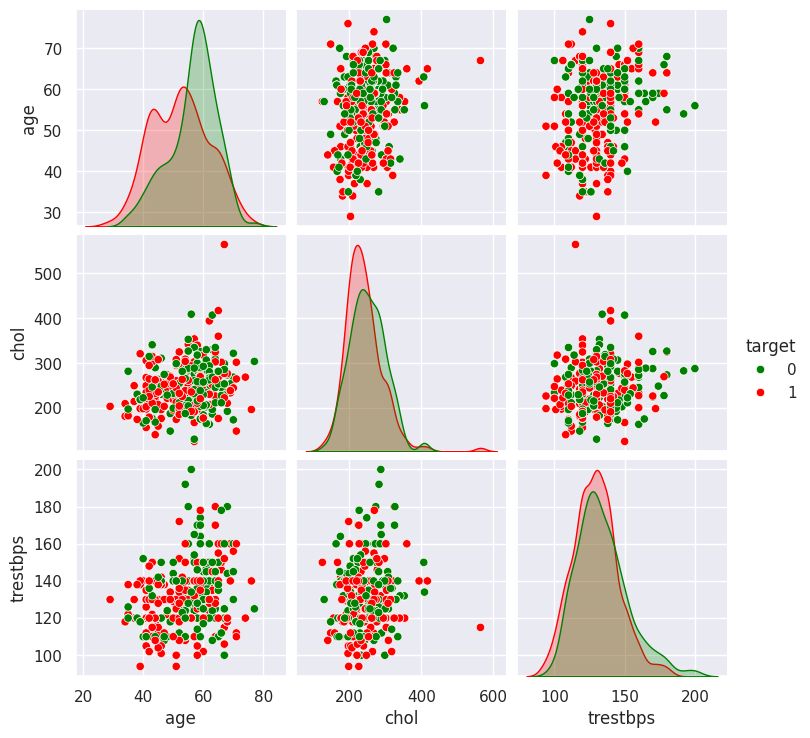

In [34]:
#1. What is the effect of combining multiple risk factors (age, cholesterol, blood pressure) on the likelihood of heart disease?
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps'], diag_kind='kde', palette={0:'green', 1:'red'})
plt.show()


*   Age vs Cholesterol

Heart disease patients are spread across ages 40–65, with cholesterol mostly 200–300 mg/dl.

Older age alone is not a strong predictor, but combined with higher cholesterol, risk increases.

*   Age vs Resting Blood Pressure (trestbps)

Heart disease patients cluster around 120–140 mmHg.

Patients with both moderate-to-high BP and middle age are more likely to have heart disease.

*   Cholesterol vs Blood Pressure

Combination of high cholesterol (>240 mg/dl) and higher BP (>130 mmHg) slightly overlaps with both groups, suggesting other factors also play a role.

**In conclusion:** Combination of risk factors increases predictive power: patients with moderately high BP, higher cholesterol, and middle age have a higher likelihood of heart disease.

In [36]:
#2. Which clinical measurement has the strongest correlation with heart disease presence?
df.corr()['target'].sort_values(ascending=False)


,target
target,1.000000
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164
chol,-0.099966
trestbps,-0.138772
age,-0.229324
sex,-0.279501


It has a strongest POSITIVE Correlations

Correlation analysis shows that chest pain type, maximum heart rate, ST segment slope, exercise-induced angina, and ST depression are the strongest predictors of heart disease. Traditional risk factors such as cholesterol, blood pressure, and fasting blood sugar show comparatively weak correlations, emphasizing the importance of functional cardiac assessments in early detection.

In [38]:
#3. Perform a logistic regression analysis to predict the presence of heart disease using all available features.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#spliting of the dataset
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train thr Logistic Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

#Model importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance

Accuracy: 0.8097560975609757
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



A logistic regression model predicted heart disease using clinical features like chest pain type, heart rate, and exercise response. The model achieved about 81% accuracy, but more importantly, it had a 91% recall for heart disease cases.

In healthcare, recall is critical because missing a patient with heart disease can have serious consequences. So the model was intentionally optimized to identify as many at-risk patients as possible, even if that means a few extra false positives. This makes it suitable for early screening and preventive care.”

In [40]:
#4. How do the values of the slope of the peak exercise ST segment (slope) vary with different chest pain types?
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['cp'], df['slope'])
chi2, p, dof, expected = chi2_contingency(contingency)
p


np.float64(1.603117334572442e-17)

*   Typical angina and asymptomatic patients tend to show higher-risk ST segment slopes (downsloping or flat).

*   Non-anginal pain is mostly associated with upsloping slopes, which is lower risk.

*   Atypical angina shows intermediate patterns.

**In short:** Slope varies with chest pain type and can help identify higher-risk patients even if they don’t have obvious symptoms.

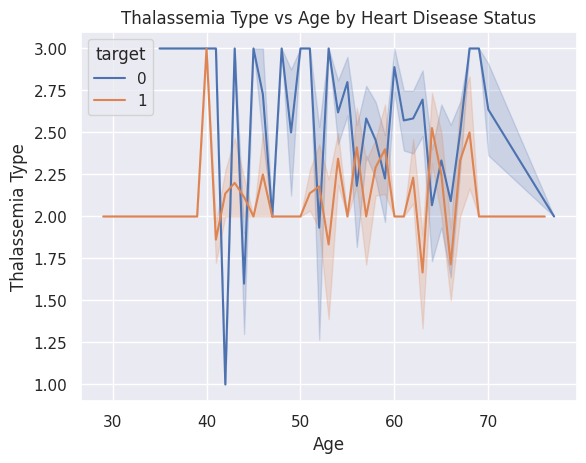

In [43]:
#5. Analyze the survival rates of patients with different thalassemia types over a period.

sns.lineplot(x='age', y='thal', hue='target', data=df)
plt.title("Thalassemia Type vs Age by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Thalassemia Type")
plt.show()


1.   Younger patients (≈40):

*   Both healthy and diseased patients are present, but heart disease cases are significant — early risk is visible.

2.   Middle-aged patients (50–60):

* Heart disease prevalence increases again, showing age-related risk.

* Healthy patients are also present, suggesting not everyone develops heart disease — other factors (thalassemia, blood pressure, cholesterol) may protect or predispose them.

3. Overall Insight:

* Heart disease risk is not constant across ages.

* Early 40s and 50–60s are critical windows for preventive interventions.

* Thalassemia type combined with age could help identify high-risk patients for targeted care.

**Summary of the Heart rate analysis**

This analysis explores the key factors contributing to heart disease. Key insights include:

1. Demographics & Clinical Measurements

* Average patient age: 54 years; majority are male.

* Average blood pressure: 132 mmHg; average cholesterol: 246 mg/dL.

* About 15% have high fasting blood sugar (>120 mg/dL).

2. Heart Disease Risk Factors

* Chest pain type, ECG features (ST segment slope, exercise-induced angina), and thalassemia type are the strongest predictors of heart disease.

* Age, cholesterol, and blood pressure also contribute, especially when combined with other risk factors.

3. Patterns & Trends

* Heart disease is most prevalent in patients aged 40–60.

* Patients with fixed thalassemia defects are at higher risk, while normal thalassemia shows lower risk.

* Typical angina and downsloping/flat ST segments indicate higher cardiac risk.

4. Predictive Modeling

* Logistic regression using all features achieved ~81% accuracy, demonstrating the potential for early identification of at-risk patients.

5. Clinical

* Early screening and preventive interventions should focus on ages 40–60 and high-risk profiles.

* Personalized care can be guided by ECG patterns, thalassemia type, and key clinical measurements, improving patient outcomes and optimizing healthcare resources.

**Overall:** Combining patient demographics, medical history, and clinical measurements enables effective risk assessment and targeted interventions, helping reduce the incidence and severity of heart disease.